# Imports
pyabf reads your abf files, scipy contains your peak-finding functions, matplotlib makes pretty graphs, and pandas and numpy are essential packages

In [1]:
import pyabf
import efel
from scipy import nanmean
import pyabf.filter
import pyabf.tools.memtest
import pyabf.plot
import numpy as np
import pandas as pd
import scipy
from scipy import signal
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from matplotlib import gridspec
import os

C:\ProgramData\Anaconda3\lib\site-packages\pyabf\tools\memtest.py:21: UserWarning: The pyabf package is designed for reading ABF files (not analyzing them). This module is experimental, provided only for backwards compatibility, and its API may change in future releases. Users are encouraged to write their own ABF analysis code.
  warnings.warn("The pyabf package is designed for reading ABF files (not analyzing them). " +
C:\ProgramData\Anaconda3\lib\site-packages\pyabf\plot.py:14: UserWarning: abf.plot is obsolete and should not be used
  warnings.warn("abf.plot is obsolete and should not be used")


# dvdt function

In [2]:
def dvdt(abf, sweep, sampling_rate, half_window_ms):
    # Select the trace in your recording
    sweep = abf.setSweep(sweepNumber=sweep, channel=0)
    # Identify the action potential with highest dV
    dv = np.diff(abf.sweepY)
    dv_max = np.argmax(dv)
    # Set the time window for the selected action potential
    sampling_rate = sampling_rate
    half_window_ms = half_window_ms
    half_window = (half_window_ms * sampling_rate)//1000
    global t_window
    t_window = abf.sweepX[dv_max-half_window:dv_max+half_window]
    v_window = abf.sweepY[dv_max-half_window:dv_max+half_window]
    # Calculate dv_dt for the selected action potential
    dv_ap = np.diff(v_window)
    dt_ap = np.diff(t_window*1000)
    dv_dt = (dv_ap)/(dt_ap)
    dv_dt_max = np.amax(dv_dt)
    # Remove the first v value to match the dv/dt array which is n-1
    v_ap_array = np.delete(v_window, 1)
    # Return the selected outputs from the function
    return {'voltage': v_window, 'dv_dt': dv_dt, 
            'dv_dt_max': dv_dt_max, 'time': t_window,
            'voltage_array': v_ap_array}

# view a single sweep

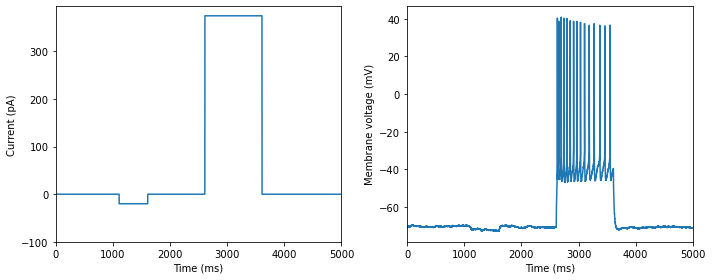

In [23]:
data = r"C:\Users\Valerie\Documents\Tejeda_Lab\4_ephys_data\TBI-MOR\atf3+\2023_05_01_0000.abf"
abf = pyabf.ABF(data)
# Set the sweep and channel
sweep = abf.setSweep(sweepNumber=23, channel=0)
 
# Define the variables
time = abf.sweepX*1000 # in miliseconds
voltage = abf.sweepY
current = abf.sweepC

fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(121)
ax1.plot(time, current)
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Current (pA)')
ax1.set_ylim(-100,)
ax1.set_xlim(0,5000)
# Zoom in to one action potential
ax2 = fig.add_subplot(122)
ax2.plot(time, voltage)
ax2.set_xlabel('Time (ms)')
ax2.set_ylabel('Membrane voltage (mV)')
ax2.set_xlim(0,5000)
plt.tight_layout()
plt.show()

# plot a single AP/phase-plane plot

dv/dt max = 212.40234375115907


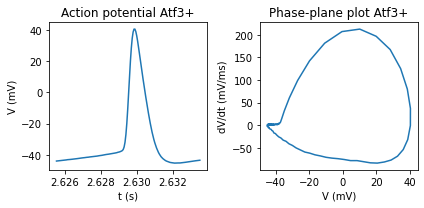

In [5]:
data = r"C:\Users\Valerie\Documents\Tejeda_Lab\4_ephys_data\TBI-MOR\atf3+\2023_05_01_0000.abf"
abf = pyabf.ABF(data)

# Inputs (the abf file, sweep number, sampling rate, half-window in ms)
dv_dt = dvdt(abf, 23, 20000, 4)
 
# Table with the voltage and dV/dt values
table = pd.DataFrame(columns = ['voltage', 'dv_dt'])  
table.voltage = pd.DataFrame(dv_dt['voltage'])
table.dv_dt = pd.DataFrame(dv_dt['dv_dt'])
 
# Graphs
fig = plt.figure(figsize=(6, 3))
# Action potential
ax1 = fig.add_subplot(121)
ax1.set_title('Action potential Atf3+')
ax1.plot(dv_dt['time'], dv_dt['voltage'])
ax1.set_ylabel("V (mV)") 
ax1.set_xlabel("t (s)")
 
# Phase plot
ax2 =fig.add_subplot(122)
ax2.set_title('Phase-plane plot Atf3+')
ax2.plot(dv_dt['voltage_array'], dv_dt['dv_dt'])
ax2.set_ylabel("dV/dt (mV/ms)") 
ax2.set_xlabel("V (mV)") 
 
# Show maximum dv/dt value, graph and table
print('dv/dt max =', dv_dt['dv_dt_max'])
fig.tight_layout()
plt.show()

# Loop averaging phase plane plots for a given folder of cc steps

In [7]:
folder = r"C:/Users/Valerie/Documents/Tejeda_Lab/4_ephys_data/TBI-MOR"

dv/dt max = 212.40234375115907


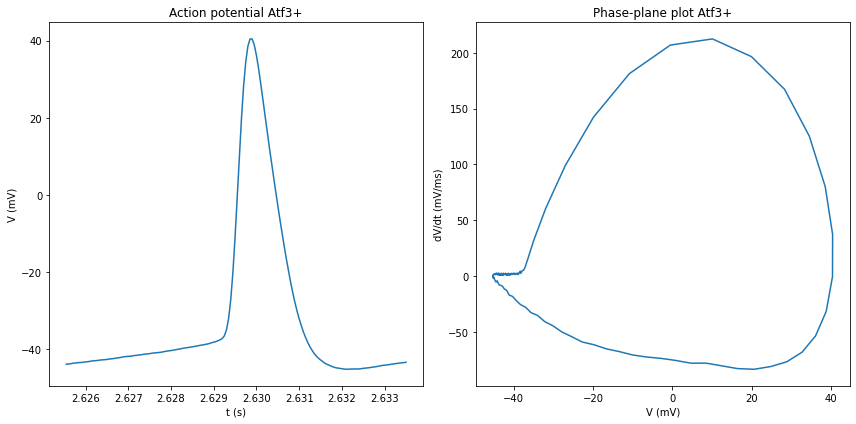

dv/dt max = 388.7939453146216


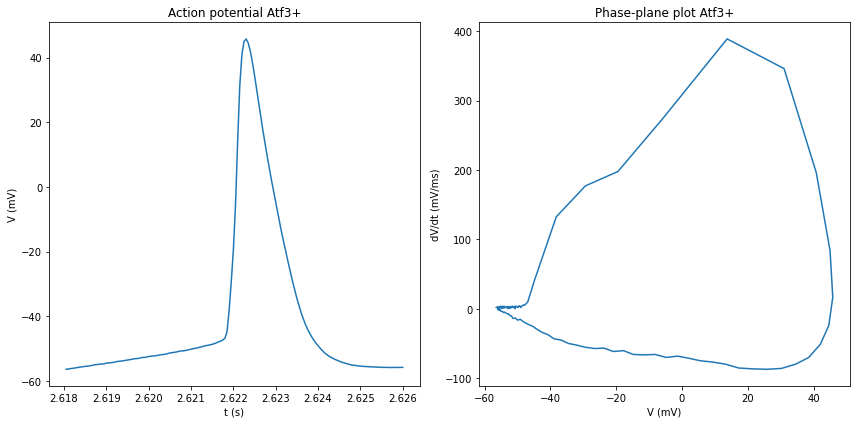

dv/dt max = 200.80566406176948


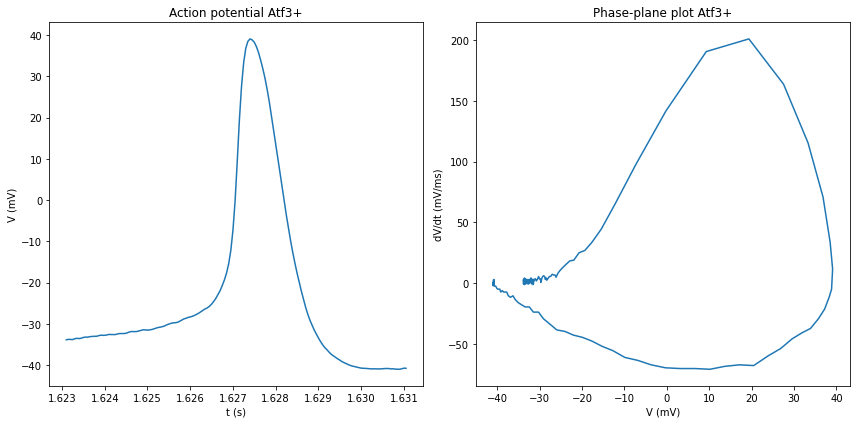

dv/dt max = 169.67773437592592


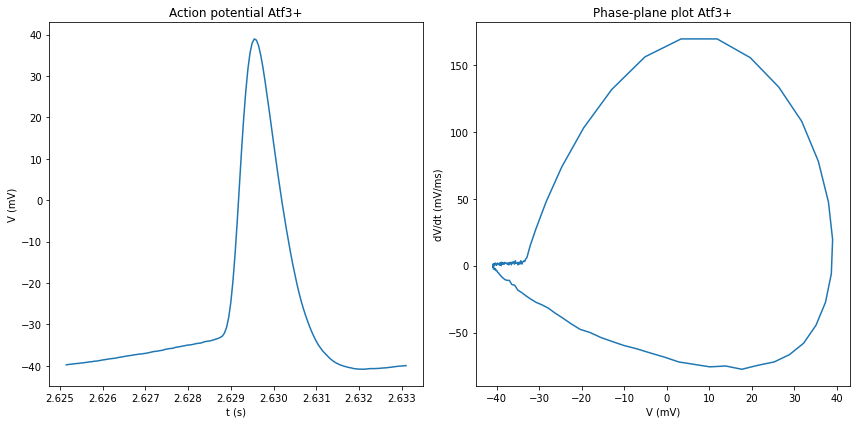

dv/dt max = 402.83203125219825


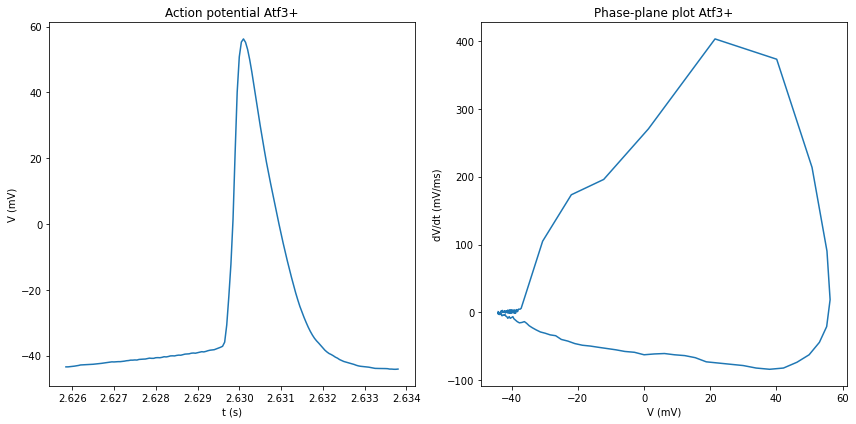

dv/dt max = 420.5322265647948


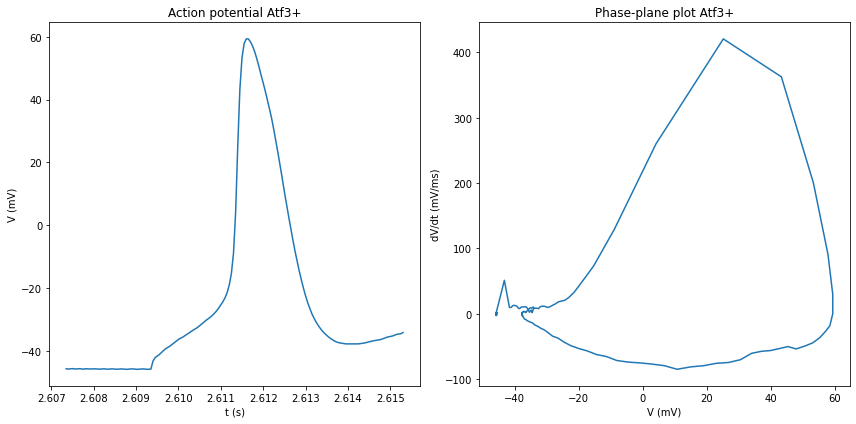

dv/dt max = 355.2246093737077


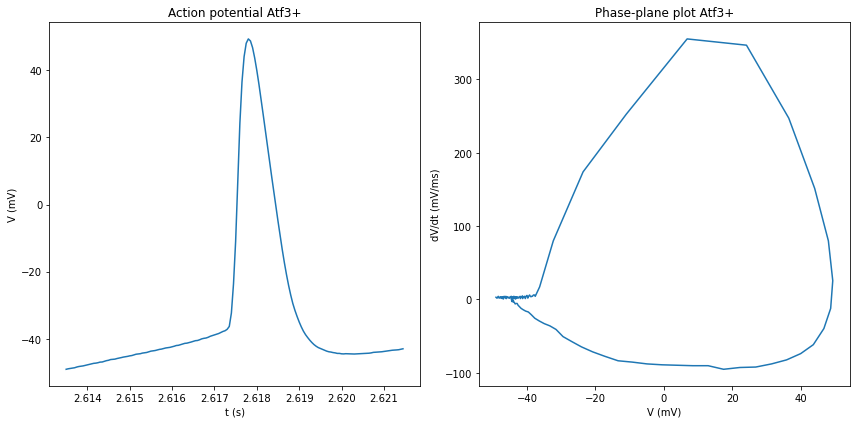

dv/dt max = 260.00976562405407


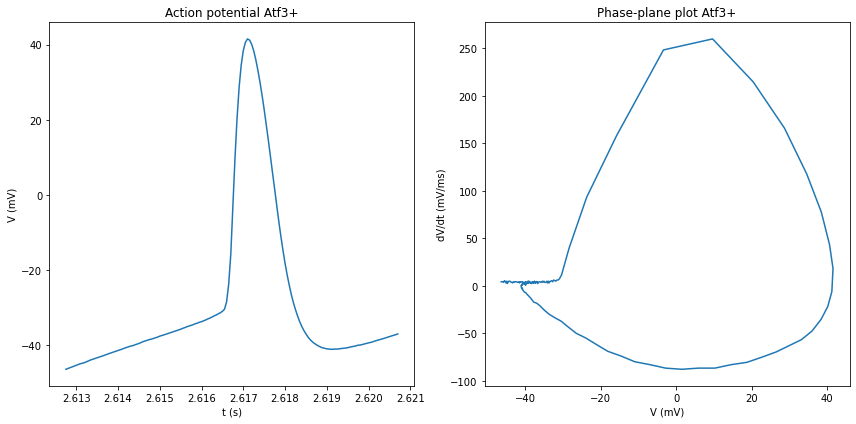

dv/dt max = 567.6269531280975


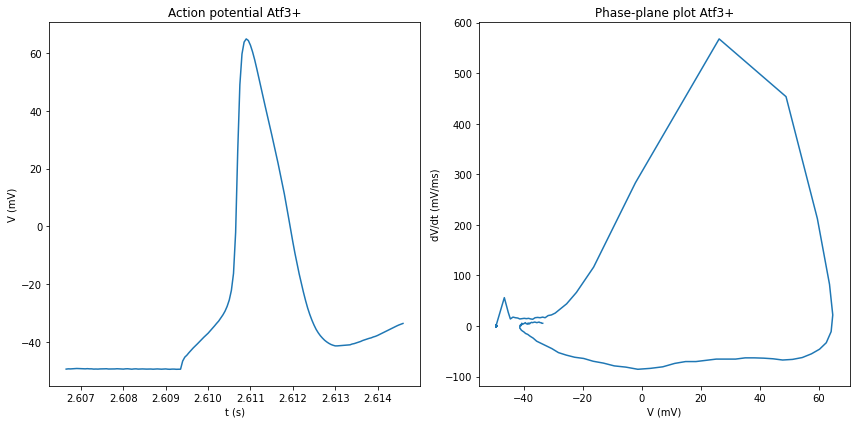

dv/dt max = 376.58691406112996


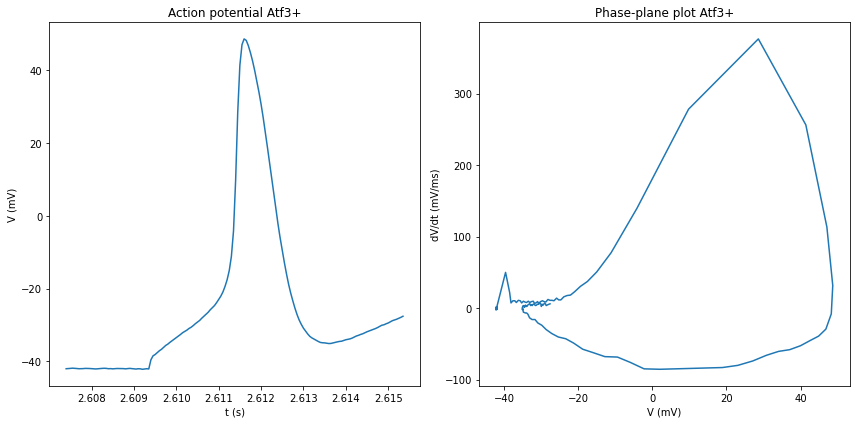

dv/dt max = 292.9687499989342


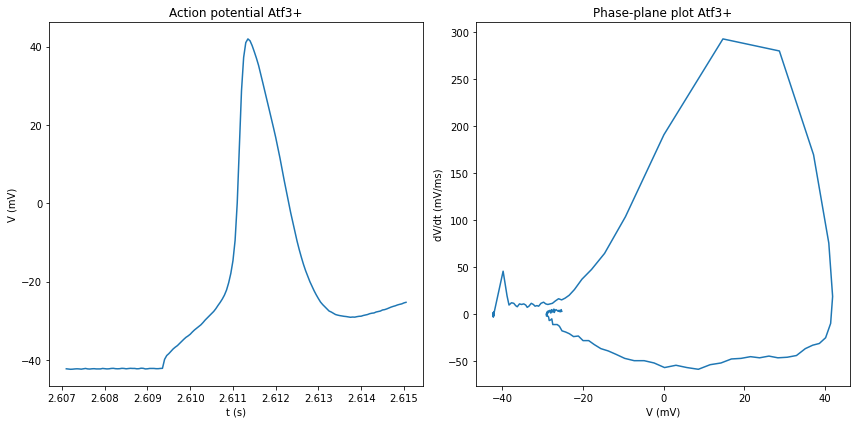

dv/dt max = 240.47851562412515


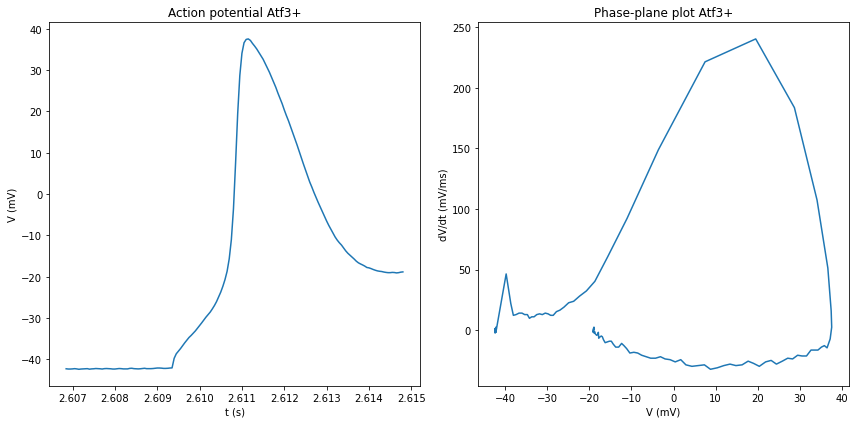

dv/dt max = 529.1748046855748


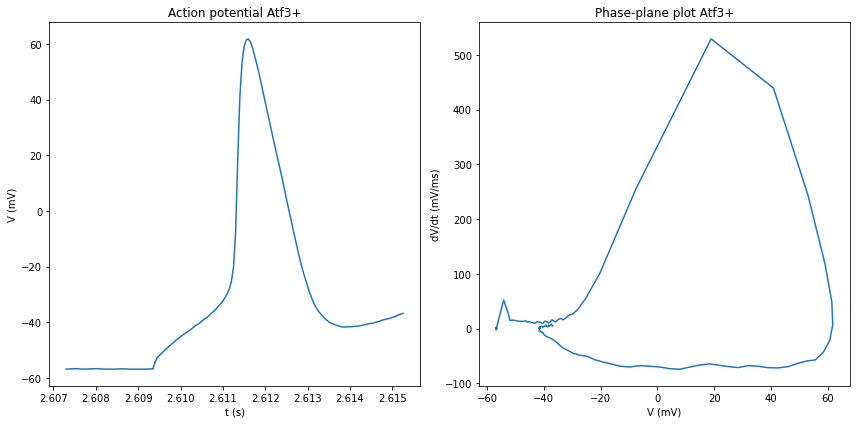

dv/dt max = 317.99316406423526


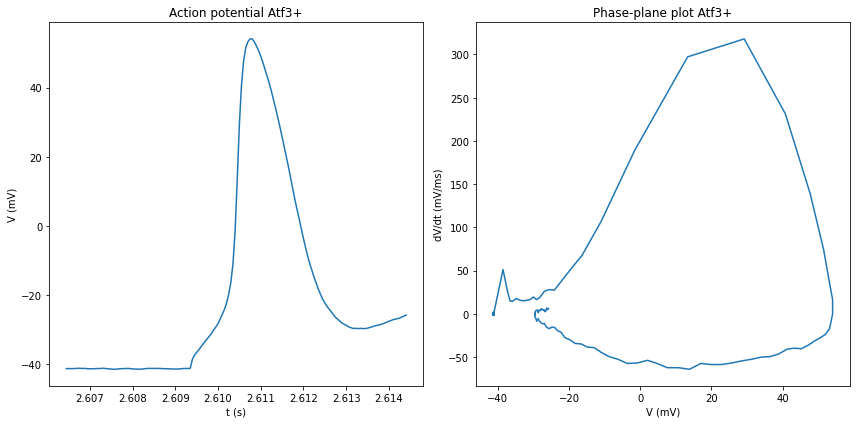

dv/dt max = 330.2001953143019


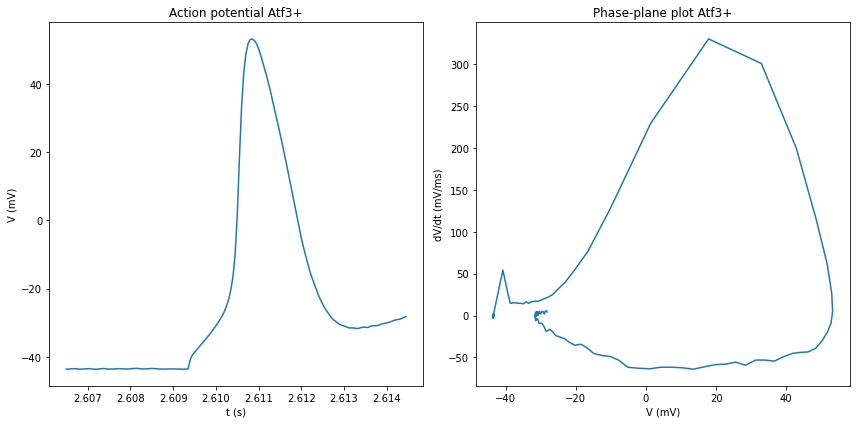

dv/dt max = 342.40722656125433


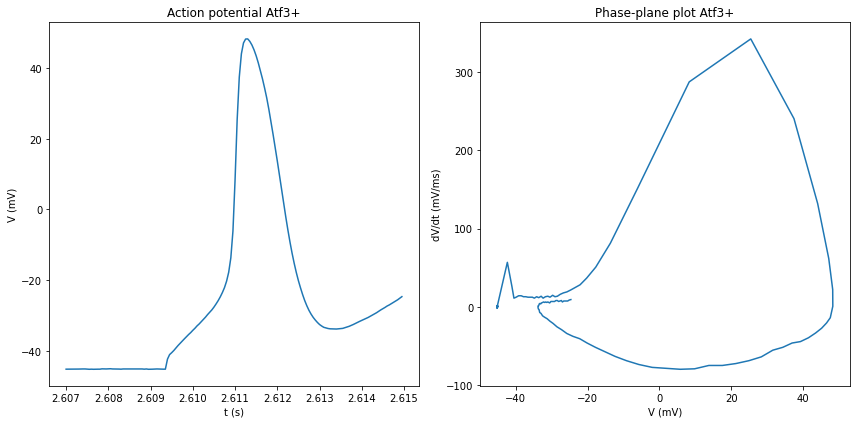

dv/dt max = 523.0712890653543


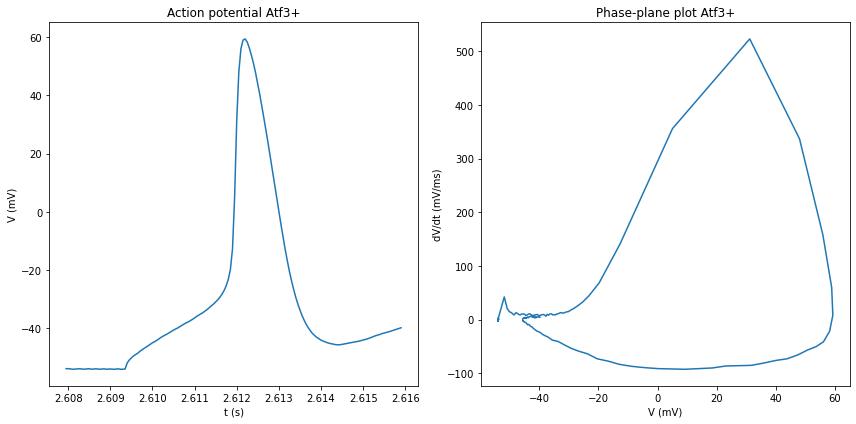

dv/dt max = 501.7089843731748


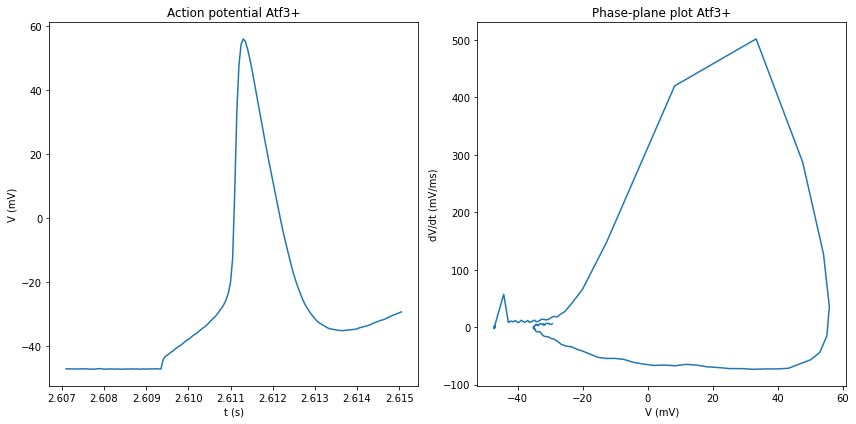

In [147]:
table = pd.DataFrame()

for i in os.listdir(folder):
    if i.endswith('.abf'):
        data = (folder + '/' + i)
        abf = pyabf.ABF(data)

        # Inputs (the abf file, sweep number, sampling rate, half-window in ms)
        dv_dt = dvdt(abf, 23, 20000, 4)

        dvdtvoltage = list(dv_dt['voltage'])
        dvdtlist = list(dv_dt['dv_dt'])
        dvdtlist.append(None)

        # Table with the voltage and dV/dt values
        table[i + '_voltage'] = dvdtvoltage
        table[i + '_dv_dt'] = dvdtlist

        # Graphs
        fig = plt.figure(figsize=(12, 6))
        # Action potential
        ax1 = fig.add_subplot(121)
        ax1.set_title('Action potential Atf3+')
        ax1.plot(dv_dt['time'], dv_dt['voltage'])
        ax1.set_ylabel("V (mV)") 
        ax1.set_xlabel("t (s)")

        # Phase plot
        ax2 =fig.add_subplot(122)
        ax2.set_title('Phase-plane plot Atf3+')
        ax2.plot(dv_dt['voltage_array'], dv_dt['dv_dt'])
        ax2.set_ylabel("dV/dt (mV/ms)") 
        ax2.set_xlabel("V (mV)") 

        # Show maximum dv/dt value, graph and table
        print('dv/dt max =', dv_dt['dv_dt_max'])
        fig.tight_layout()
        plt.savefig(folder + '/' + i + '.tiff')
        plt.show()

table['average_voltage'] = table[[x for x in table.columns if 'voltage' in x]].mean(axis=1)
table['average_dv_dt'] = table[[x for x in table.columns if 'dv_dt' in x]].mean(axis=1)
table.to_csv(folder + '/average.csv')

# Plot average phase-plane plot

dv/dt max = 501.7089843731748


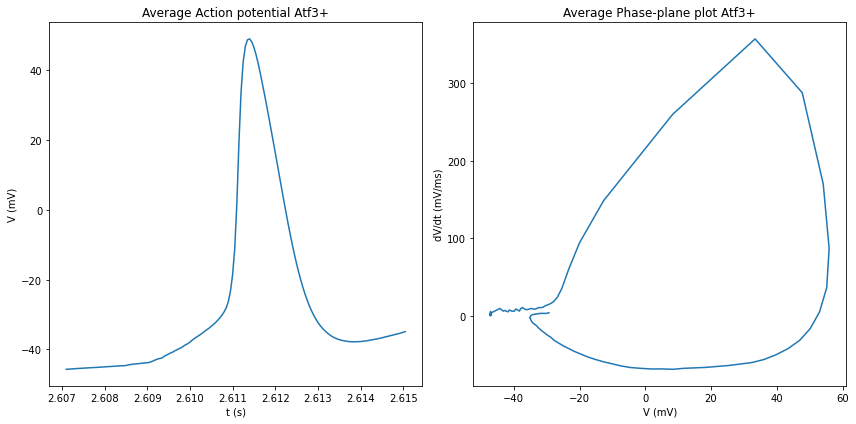

In [148]:
fig = plt.figure(figsize=(12, 6))
# Action potential
ax1 = fig.add_subplot(121)
ax1.set_title('Average Action potential Atf3+')
ax1.plot(dv_dt['time'], table['average_voltage'])
ax1.set_ylabel("V (mV)") 
ax1.set_xlabel("t (s)")
 
# Phase plot
ax2 =fig.add_subplot(122)
ax2.set_title('Average Phase-plane plot Atf3+')
ax2.plot(dv_dt['voltage_array'], table['average_dv_dt'][:-1])
ax2.set_ylabel("dV/dt (mV/ms)") 
ax2.set_xlabel("V (mV)") 
 
# Show maximum dv/dt value, graph and table
print('dv/dt max =', dv_dt['dv_dt_max'])
fig.tight_layout()
plt.savefig(folder + '/average_phase_plot.tiff')
plt.show()

# Plot overlay

In [3]:
table1 = pd.read_csv(r"C:\Users\Valerie\Documents\Tejeda_Lab\4_ephys_data\TBI-MOR\atf3-notinj\average.csv")
table2 = pd.read_csv(r"C:\Users\Valerie\Documents\Tejeda_Lab\4_ephys_data\TBI-MOR\atf3-\average.csv")
table3 = pd.read_csv(r"C:\Users\Valerie\Documents\Tejeda_Lab\4_ephys_data\TBI-MOR\atf3+\average.csv")

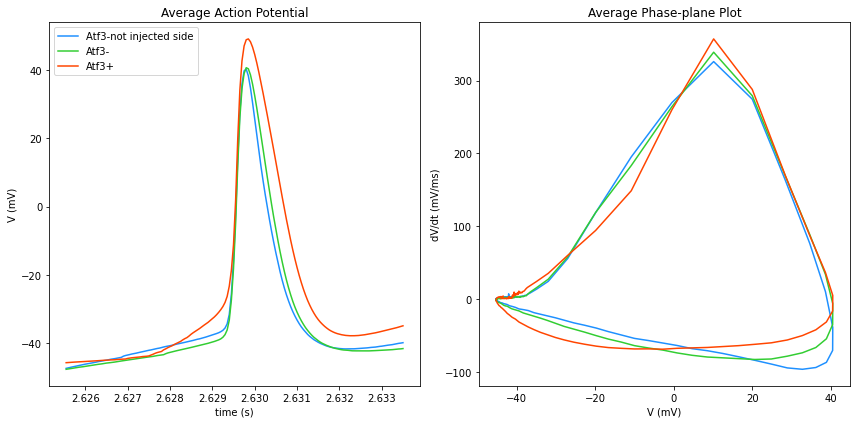

In [8]:
fig = plt.figure(figsize=(12, 6))
# Action potential
ax1 = fig.add_subplot(121)
ax1.set_title('Average Action Potential')
ax1.plot(dv_dt['time'], table1['average_voltage'], label='Atf3-not injected side', color='dodgerblue')
ax1.plot(dv_dt['time'], table2['average_voltage'], label='Atf3-', color='limegreen')
ax1.plot(dv_dt['time'], table3['average_voltage'], label='Atf3+', color='orangered')
ax1.plot()
ax1.set_ylabel("V (mV)") 
ax1.set_xlabel("time (s)")
plt.legend(loc='upper left')
 
# Phase plot
ax2 =fig.add_subplot(122)
ax2.set_title('Average Phase-plane Plot')
ax2.plot(dv_dt['voltage_array'], table1['average_dv_dt'][:-1], label='Atf3-not injected side', color='dodgerblue')
ax2.plot(dv_dt['voltage_array'], table2['average_dv_dt'][:-1], label='Atf3-not injected side', color='limegreen')
ax2.plot(dv_dt['voltage_array'], table3['average_dv_dt'][:-1], label='Atf3-not injected side', color='orangered')
ax2.set_ylabel("dV/dt (mV/ms)") 
ax2.set_xlabel("V (mV)") 
 
# Show maximum dv/dt value, graph and table
fig.tight_layout()
plt.savefig(folder + '/average_phase_plot.tiff')
plt.show()